In [46]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df  = yf.download("AAPL", start='2000-01-01', end='2023-01-09')

df.reset_index(drop=True, inplace=True)

df.head()

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
0,0.936384,1.004464,0.907924,0.999442,0.851942,535796800
1,0.966518,0.987723,0.903460,0.915179,0.780115,512377600
2,0.926339,0.987165,0.919643,0.928571,0.791530,778321600
3,0.947545,0.955357,0.848214,0.848214,0.723033,767972800
4,0.861607,0.901786,0.852679,0.888393,0.757282,460734400
...,...,...,...,...,...,...
5786,128.410004,129.949997,127.430000,129.929993,129.929993,76960600
5787,130.279999,130.899994,124.169998,125.070000,125.070000,112117500
5788,126.889999,128.660004,125.080002,126.360001,126.360001,89113600
5789,127.129997,127.769997,124.760002,125.019997,125.019997,80962700


In [47]:
df = df.astype('float64')

In [48]:
X = df.drop(columns=['Adj Close'])
y = df['Adj Close']

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state = 0)

In [51]:
X_train = X_train.values.reshape(X_train.shape[0],1,X_train.shape[1],1)
X_test = X_test.values.reshape(X_test.shape[0],1,X_test.shape[1],1)

In [52]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D,GRU, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()


model.add(TimeDistributed(Conv1D(16, kernel_size=1, activation='relu', padding='same', input_shape=(2620,5,1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(32, kernel_size=1, activation='relu', padding='same')))
model.add(TimeDistributed(MaxPooling1D(2, padding='same')))
model.add(TimeDistributed(Conv1D(16, kernel_size=1, activation='relu', padding='same')))
model.add(TimeDistributed(MaxPooling1D(2, padding='same')))
model.add(TimeDistributed(Flatten()))


model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=40,batch_size=40, verbose=1, shuffle =True)


Epoch 1/40
116/116 [==============================] - 1s 3ms/step - loss: 2647.6130 - mse: 2647.6130 - mae: 28.3378 - val_loss: 2520.4785 - val_mse: 2520.4785 - val_mae: 27.7187
Epoch 2/40
116/116 [==============================] - 0s 2ms/step - loss: 2024.9722 - mse: 2024.9722 - mae: 24.8645 - val_loss: 1285.1951 - val_mse: 1285.1951 - val_mae: 22.8486
Epoch 3/40
116/116 [==============================] - 0s 2ms/step - loss: 961.0656 - mse: 961.0654 - mae: 23.6253 - val_loss: 678.4174 - val_mse: 678.4174 - val_mae: 21.0273
Epoch 4/40
116/116 [==============================] - 0s 2ms/step - loss: 409.3608 - mse: 409.3608 - mae: 16.5478 - val_loss: 144.9361 - val_mse: 144.9361 - val_mae: 10.1067
Epoch 5/40
116/116 [==============================] - 0s 2ms/step - loss: 46.5623 - mse: 46.5623 - mae: 5.1934 - val_loss: 3.5503 - val_mse: 3.5503 - val_mae: 1.6260
Epoch 6/40
116/116 [==============================] - 0s 2ms/step - loss: 1.2562 - mse: 1.2562 - mae: 0.8691 - val_loss: 0.6658 - 

In [53]:
y_pred = model.predict(X_test)

37/37 [==============================] - 0s 834us/step


In [54]:
len(y_test)

1159

In [55]:
y_pred = y_pred.reshape(y_pred.shape[0],1)

In [56]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.3780466357249206

In [57]:
y_pred =pd.DataFrame(y_pred).set_index(y_test.index)

In [58]:
y_test = y_test.sort_index()

In [59]:
y_pred = y_pred.sort_index()

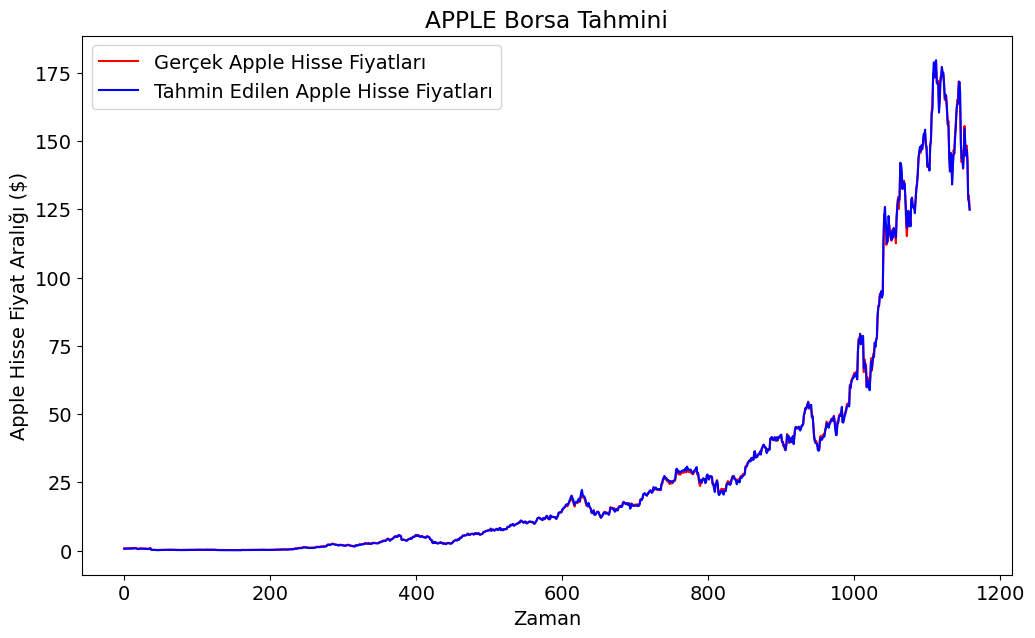

In [60]:
import matplotlib.pyplot as plt

predicted_stock_price = y_pred
actual_stock_price = y_test

plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

plt.plot(np.arange(1159),actual_stock_price, color="red", label="Gerçek Apple Hisse Fiyatları")
plt.plot(np.arange(1159),predicted_stock_price, color="blue", label="Tahmin Edilen Apple Hisse Fiyatları")
plt.title("APPLE Borsa Tahmini")
plt.xlabel("Zaman")
plt.ylabel("Apple Hisse Fiyat Aralığı ($)")
plt.legend();